In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [4]:
df_train = pd.read_csv("Task/train.csv")
df_test = pd.read_csv("Task/test.csv")

## Start extracting features from the train df

In [7]:
# Feature extraction from complete data
df_extracted_features = df_train.iloc[:, np.r_[2:24, 26, 27:31, 31:35, 35:57, ]]

## Create average feature from the TQWT feature columns

In [8]:
tqwt_columns = [col for col in df_train.columns if 'tqwt' in col]
df_train_tqwt = df_train[tqwt_columns]

measures = ['tqwt_energy','tqwt_entropy_shannon','tqwt_entropy_log',\
'tqwt_TKEO_mean','tqwt_TKEO_std','tqwt_medianValue','tqwt_meanValue',\
            'tqwt_stdValue','tqwt_minValue','tqwt_maxValue','tqwt_skewnessValue','tqwt_kurtosisValue']

for measure in measures:
    filter_columns = [f'{measure}_dec_{i}' for i in range(1, 37)]
    df_train_tqwt[f'avg_{measure}'] = df_train_tqwt[filter_columns].apply(lambda row: row.mean(), axis=1)

avg_col = [col for col in df_train_tqwt.columns if 'avg' in col]
df_tqwt_avg = df_train_tqwt[avg_col]

# create df for all the averages
avg_col = [col for col in df_train_tqwt.columns if 'avg' in col]
df_tqwt_avg = df_train_tqwt[avg_col]

/tmp/ipykernel_2163672/3718341024.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_tqwt[f'avg_{measure}'] = df_train_tqwt[filter_columns].apply(lambda row: row.mean(), axis=1)
/tmp/ipykernel_2163672/3718341024.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_tqwt[f'avg_{measure}'] = df_train_tqwt[filter_columns].apply(lambda row: row.mean(), axis=1)
/tmp/ipykernel_2163672/3718341024.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

## Create average from the Wavelet feature columns

In [9]:
wavelet_measures = ['Ea','Ed','det_entropy_shannon','det_entropy_log','det_TKEO_mean','det_TKEO_std',\
                    'app_entropy_shannon','app_entropy_log','app_det_TKEO_mean','app_TKEO_std','Ed2',\
                    'det_LT_entropy_shannon','det_LT_entropy_log','det_LT_TKEO_mean','det_LT_TKEO_std',\
                    'app_LT_entropy_shannon','app_LT_entropy_log','app_LT_TKEO_mean','app_LT_TKEO_std']

df_wavelet_features = df_train.iloc[:,141:323]
for measure in wavelet_measures:
    if (measure != 'Ea' and measure != 'Ea2'):
        filter_columns = [f'{measure}_{i}_coef' for i in range(1, 11)]
        df_wavelet_features[f'avg_{measure}'] = df_wavelet_features[filter_columns].apply(lambda row: row.mean(), axis=1)

df_wavelet_features['avg_Ea'] = df_wavelet_features[['Ea','Ea2']].apply(lambda row: row.mean(), axis=1)

wavelet_avg_col = [col for col in df_wavelet_features.columns if 'avg' in col]
df_wavelet_features_avg = df_wavelet_features[wavelet_avg_col]

## Create average from the MFCC feature columns

In [10]:
df_mfcc_features = df_train.iloc[:,57:141]
# rename the column name
df_mfcc_features.rename(columns={'std_delta_delta_0th': 'std_0th_delta_delta'}, inplace=True)
df_mfcc_features.rename(columns={'mean_delta_delta_0th': 'mean_0th_delta_delta'}, inplace=True)

mean_MFCC_columns = [f'mean_MFCC_{i}{"th" if i not in [1, 2, 3] else ("st" if i == 1 else ("nd" if i == 2 else "rd"))}_coef' for i in range(0, 13)]
df_mfcc_features[f'avg_mean_MFCC_coef'] = df_mfcc_features[mean_MFCC_columns].apply(lambda row: row.mean(), axis=1)

mean_delta_columns = [f'mean_{i}{"th" if i not in [1, 2, 3] else ("st" if i == 1 else ("nd" if i == 2 else "rd"))}_delta' for i in range(0, 13)]
df_mfcc_features[f'avg_mean_delta'] = df_mfcc_features[mean_delta_columns].apply(lambda row: row.mean(), axis=1)

mean_delta_delta_columns = [f'mean_{i}{"th" if i not in [1, 2, 3] else ("st" if i == 1 else ("nd" if i == 2 else "rd"))}_delta_delta' for i in range(0, 13)]
df_mfcc_features[f'avg_mean_delta_delta'] = df_mfcc_features[mean_delta_delta_columns].apply(lambda row: row.mean(), axis=1)

std_MFCC_coef_columns = [f'std_MFCC_{i}{"th" if i not in [1, 2, 3] else ("st" if i == 1 else ("nd" if i == 2 else "rd"))}_coef' for i in range(0, 13)]
df_mfcc_features[f'avg_std_MFCC_coef'] = df_mfcc_features[std_MFCC_coef_columns].apply(lambda row: row.mean(), axis=1)

std_delta_columns = [f'std_{i}{"th" if i not in [1, 2, 3] else ("st" if i == 1 else ("nd" if i == 2 else "rd"))}_delta' for i in range(0, 13)]
df_mfcc_features[f'avg_std_delta'] = df_mfcc_features[std_delta_columns].apply(lambda row: row.mean(), axis=1)

std_delta_delta_columns = [f'std_{i}{"th" if i not in [1, 2, 3] else ("st" if i == 1 else ("nd" if i == 2 else "rd"))}_delta_delta' for i in range(0, 13)]
df_mfcc_features[f'avg_std_delta_delta'] = df_mfcc_features[std_delta_delta_columns].apply(lambda row: row.mean(), axis=1)


# Create new df using the constructed averages
avg_mfcc_col = [col for col in df_mfcc_features.columns if 'avg' in col]
df_mfcc_features_avg = df_mfcc_features[avg_mfcc_col]
df_mfcc_features_avg[["mean_Log_energy",\
"mean_delta_delta_log_energy","std_Log_energy",\
"std_delta_log_energy","std_delta_delta_log_energy"]] = df_mfcc_features[["mean_Log_energy","mean_delta_delta_log_energy",\
                                                                          "std_Log_energy","std_delta_log_energy",\
                                                                          "std_delta_delta_log_energy"]]

/tmp/ipykernel_2163672/4202174981.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mfcc_features_avg[["mean_Log_energy",\
/tmp/ipykernel_2163672/4202174981.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mfcc_features_avg[["mean_Log_energy",\
/tmp/ipykernel_2163672/4202174981.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

## Combine seperatly processed data to single df

In [11]:
df_combined_features = pd.concat([df_extracted_features, df_mfcc_features_avg, df_wavelet_features_avg, df_tqwt_avg], axis=1)

## Normalise the combined train df

In [14]:
# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the DataFrame
df_to_normalize = df_combined_features.drop(columns=['gender'])
df_normalized = pd.DataFrame(scaler.fit_transform(df_to_normalize), columns=df_to_normalize.columns)
df_normalized['gender'] = df_combined_features['gender']

## Keep only one feature column from the highly correlated feature column sets

In [15]:
# Compute correlation matrix
corr_matrix = df_normalized.corr().abs()

# Select upper triangle of correlation matrix to avoid duplicate pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop the features with high correlation
df_normalized_reduced = df_normalized.drop(columns=to_drop)

# Print dropped columns
print("Dropped columns due to high correlation:", to_drop)

Dropped columns due to high correlation: ['numPeriodsPulses', 'meanPeriodPulses', 'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter', 'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'meanNoiseToHarmHarmonicity', 'meanHarmToNoiseHarmonicity', 'GNE_NSR_TKEO', 'VFER_entropy', 'IMF_NSR_entropy', 'avg_std_delta', 'avg_std_delta_delta', 'std_delta_log_energy', 'std_delta_delta_log_energy', 'avg_det_TKEO_mean', 'avg_det_TKEO_std', 'avg_app_entropy_shannon', 'avg_app_entropy_log', 'avg_app_det_TKEO_mean', 'avg_app_TKEO_std', 'avg_Ed2', 'avg_det_LT_entropy_shannon', 'avg_det_LT_entropy_log', 'avg_det_LT_TKEO_mean', 'avg_det_LT_TKEO_std', 'avg_app_LT_entropy_shannon', 'avg_app_LT_entropy_log', 'avg_app_LT_TKEO_mean', 'avg_app_LT_TKEO_std', 'avg_Ea', 'avg_tqwt_TKEO_std', 'avg_tqwt_stdValue', 'avg_tqwt_minValue', 'avg_tqwt_maxValue']


In [16]:
df_normalized_reduced.shape

(567, 55)

## # Apply SMOTE to balance the number of rows for each category of the dependent variable

In [17]:
# 4. Apply SMOTE after normalization
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_normalized_reduced, df_train["class"])

## Split the train data to train and test

In [20]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Train and test the models 

In [23]:
# Train and evaluate different classification models

# 1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7602339181286549
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77        88
           1       0.76      0.75      0.75        83

    accuracy                           0.76       171
   macro avg       0.76      0.76      0.76       171
weighted avg       0.76      0.76      0.76       171



In [24]:
# 2. Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.8070175438596491
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        88
           1       0.83      0.76      0.79        83

    accuracy                           0.81       171
   macro avg       0.81      0.81      0.81       171
weighted avg       0.81      0.81      0.81       171



In [25]:
# 2. Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.935672514619883
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        88
           1       0.94      0.93      0.93        83

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## Process the new dataset also as we done for the train data

In [26]:
def preprocessing_df(df):
    # Feature extraction from complete data
    df_extracted_features = df.iloc[:, np.r_[2:24, 26, 27:31, 31:35, 35:57, ]]
    
    #MFCC feature processing
    df_mfcc = df.iloc[:,57:141]
    # correcting column names
    df_mfcc.rename(columns={'std_delta_delta_0th': 'std_0th_delta_delta'}, inplace=True)
    df_mfcc.rename(columns={'mean_delta_delta_0th': 'mean_0th_delta_delta'}, inplace=True)
    
    #Calculating mean of the similar attribute columns
    mean_MFCC_columns = [f'mean_MFCC_{i}{"th" if i not in [1, 2, 3] else ("st" if i == 1 else ("nd" if i == 2 else "rd"))}_coef' for i in range(0, 13)]
    df_mfcc[f'avg_mean_MFCC_coef'] = df_mfcc[mean_MFCC_columns].apply(lambda row: row.mean(), axis=1)
    
    mean_delta_columns = [f'mean_{i}{"th" if i not in [1, 2, 3] else ("st" if i == 1 else ("nd" if i == 2 else "rd"))}_delta' for i in range(0, 13)]
    df_mfcc[f'avg_mean_delta'] = df_mfcc[mean_delta_columns].apply(lambda row: row.mean(), axis=1)
    
    mean_delta_delta_columns = [f'mean_{i}{"th" if i not in [1, 2, 3] else ("st" if i == 1 else ("nd" if i == 2 else "rd"))}_delta_delta' for i in range(0, 13)]
    df_mfcc[f'avg_mean_delta_delta'] = df_mfcc[mean_delta_delta_columns].apply(lambda row: row.mean(), axis=1)
    
    std_MFCC_coef_columns = [f'std_MFCC_{i}{"th" if i not in [1, 2, 3] else ("st" if i == 1 else ("nd" if i == 2 else "rd"))}_coef' for i in range(0, 13)]
    df_mfcc[f'avg_std_MFCC_coef'] = df_mfcc[std_MFCC_coef_columns].apply(lambda row: row.mean(), axis=1)
    
    std_delta_columns = [f'std_{i}{"th" if i not in [1, 2, 3] else ("st" if i == 1 else ("nd" if i == 2 else "rd"))}_delta' for i in range(0, 13)]
    df_mfcc[f'avg_std_delta'] = df_mfcc[std_delta_columns].apply(lambda row: row.mean(), axis=1)
    
    std_delta_delta_columns = [f'std_{i}{"th" if i not in [1, 2, 3] else ("st" if i == 1 else ("nd" if i == 2 else "rd"))}_delta_delta' for i in range(0, 13)]
    df_mfcc[f'avg_std_delta_delta'] = df_mfcc[std_delta_delta_columns].apply(lambda row: row.mean(), axis=1)
    
    
    # Create new df using the constructed averages
    avg_mfcc_col = [col for col in df_mfcc.columns if 'avg' in col]
    df_mfcc_features_avg = df_mfcc[avg_mfcc_col]
    df_mfcc_features_avg[["mean_Log_energy",\
    "mean_delta_delta_log_energy","std_Log_energy",\
    "std_delta_log_energy","std_delta_delta_log_energy"]] = df_mfcc[["mean_Log_energy","mean_delta_delta_log_energy",\
                                                                              "std_Log_energy","std_delta_log_energy",\
                                                                              "std_delta_delta_log_energy"]]

    # Wavelet features
    wavelet_measures = ['Ea','Ed','det_entropy_shannon','det_entropy_log','det_TKEO_mean','det_TKEO_std',\
                    'app_entropy_shannon','app_entropy_log','app_det_TKEO_mean','app_TKEO_std','Ed2',\
                    'det_LT_entropy_shannon','det_LT_entropy_log','det_LT_TKEO_mean','det_LT_TKEO_std',\
                    'app_LT_entropy_shannon','app_LT_entropy_log','app_LT_TKEO_mean','app_LT_TKEO_std']
    df_wavelet_features = df.iloc[:,141:323]
    for measure in wavelet_measures:
        if (measure != 'Ea' and measure != 'Ea2'):
            filter_columns = [f'{measure}_{i}_coef' for i in range(1, 11)]
            df_wavelet_features[f'avg_{measure}'] = df_wavelet_features[filter_columns].apply(lambda row: row.mean(), axis=1)
    
    df_wavelet_features['avg_Ea'] = df_wavelet_features[['Ea','Ea2']].apply(lambda row: row.mean(), axis=1)
    
    wavelet_avg_col = [col for col in df_wavelet_features.columns if 'avg' in col]
    df_wavelet_features_avg = df_wavelet_features[wavelet_avg_col]

    # TQWT features
    tqwt_columns = [col for col in df.columns if 'tqwt' in col]
    df_train_tqwt = df[tqwt_columns]
    
    measures = ['tqwt_energy','tqwt_entropy_shannon','tqwt_entropy_log',\
    'tqwt_TKEO_mean','tqwt_TKEO_std','tqwt_medianValue','tqwt_meanValue',\
                'tqwt_stdValue','tqwt_minValue','tqwt_maxValue','tqwt_skewnessValue','tqwt_kurtosisValue']
    
    for measure in measures:
        filter_columns = [f'{measure}_dec_{i}' for i in range(1, 37)]
        df_train_tqwt[f'avg_{measure}'] = df_train_tqwt[filter_columns].apply(lambda row: row.mean(), axis=1)
    
    avg_col = [col for col in df_train_tqwt.columns if 'avg' in col]
    df_tqwt_avg = df_train_tqwt[avg_col]


    # combined extracted feature columns df
    df_combined_features = pd.concat([df_extracted_features, df_mfcc_features_avg, df_wavelet_features_avg, df_tqwt_avg], axis=1)

    print(f'extracted feature df shape: {df_combined_features.shape}')


    # Initialize the scaler
    scaler = MinMaxScaler()
    # Normalize the DataFrame
    df_to_normalize = df_combined_features.drop(columns=['gender'])
    df_normalized = pd.DataFrame(scaler.fit_transform(df_to_normalize), columns=df_to_normalize.columns)
    df_normalized['gender'] = df_combined_features['gender']

    # columns droped in the train df
    to_drop = ['numPeriodsPulses', 'meanPeriodPulses', 'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',\
               'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'meanNoiseToHarmHarmonicity',\
               'meanHarmToNoiseHarmonicity', 'GNE_NSR_TKEO', 'VFER_entropy', 'IMF_NSR_entropy', 'avg_std_delta', 'avg_std_delta_delta',\
               'std_delta_log_energy', 'std_delta_delta_log_energy', 'avg_det_TKEO_mean', 'avg_det_TKEO_std', 'avg_app_entropy_shannon',\
               'avg_app_entropy_log', 'avg_app_det_TKEO_mean', 'avg_app_TKEO_std', 'avg_Ed2', 'avg_det_LT_entropy_shannon',\
               'avg_det_LT_entropy_log', 'avg_det_LT_TKEO_mean', 'avg_det_LT_TKEO_std', 'avg_app_LT_entropy_shannon',\
               'avg_app_LT_entropy_log', 'avg_app_LT_TKEO_mean', 'avg_app_LT_TKEO_std', 'avg_Ea', 'avg_tqwt_TKEO_std',\
               'avg_tqwt_stdValue', 'avg_tqwt_minValue', 'avg_tqwt_maxValue']
    df_normalized_reduced = df_normalized.drop(columns=to_drop)
    return df_normalized_reduced

In [27]:
df_test_processed = preprocessing_df(df_test)

/tmp/ipykernel_2163672/1234659727.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mfcc_features_avg[["mean_Log_energy",\
/tmp/ipykernel_2163672/1234659727.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mfcc_features_avg[["mean_Log_energy",\
/tmp/ipykernel_2163672/1234659727.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

extracted feature df shape: (189, 95)


In [28]:
df_test_processed.shape

(189, 55)

## Find the accuracy in the new validation data

In [32]:
# Random forest model
y_pred_rf = rf_clf.predict(df_test_processed)
print("Random Forest Accuracy:", accuracy_score(df_test['class'], y_pred_rf))
print("Classification Report:\n", classification_report(df_test['class'], y_pred_rf))

Random Forest Accuracy: 0.8042328042328042
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.53      0.59        51
           1       0.84      0.91      0.87       138

    accuracy                           0.80       189
   macro avg       0.76      0.72      0.73       189
weighted avg       0.79      0.80      0.80       189



In [33]:
# support vector machine model
y_pred_svc = svc.predict(df_test_processed)
print("SVC Accuracy:", accuracy_score(df_test['class'], y_pred_svc))
print("Classification Report:\n", classification_report(df_test['class'], y_pred_svc))

SVC Accuracy: 0.6031746031746031
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.94      0.56        51
           1       0.96      0.48      0.64       138

    accuracy                           0.60       189
   macro avg       0.68      0.71      0.60       189
weighted avg       0.81      0.60      0.62       189



In [34]:
# Logistic regression model
y_pred_lr = log_reg.predict(df_test_processed)
print("Logistic Regression Accuracy:", accuracy_score(df_test['class'], y_pred_lr))
print("Classification Report:\n", classification_report(df_test['class'], y_pred_lr))

Logistic Regression Accuracy: 0.5555555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.96      0.54        51
           1       0.97      0.41      0.57       138

    accuracy                           0.56       189
   macro avg       0.67      0.68      0.55       189
weighted avg       0.81      0.56      0.56       189



## Try out other hyper parameter tuning and feature extraction methods

In [37]:
# Initialize the model
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best model accuracy: {accuracy:.4f}')

Best model accuracy: 0.9649


In [38]:
# Random forest model with gridSearch
y_pred_rf = best_rf.predict(df_test_processed)
print("Random Forest Accuracy:", accuracy_score(df_test['class'], y_pred_rf))
print("Classification Report:\n", classification_report(df_test['class'], y_pred_rf))

Random Forest Accuracy: 0.7936507936507936
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63        51
           1       0.87      0.85      0.86       138

    accuracy                           0.79       189
   macro avg       0.74      0.75      0.74       189
weighted avg       0.80      0.79      0.80       189



## Try feature selection based on the feature importance from the preprocessed df

In [41]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. Feature selection based on importance
selector = SelectFromModel(model, threshold='median')  # You can also set a custom threshold
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)  # Apply to validation set

# 5. Train the model on the selected features
model.fit(X_train_selected, y_train)

# Evaluate the model on validation data
y_test_pred = model.predict(X_test_selected)
print("Validation Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.9532163742690059
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        88
           1       0.95      0.95      0.95        83

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [42]:
# Transform the new dataset using the same feature selection
X_new_selected = selector.transform(df_test_processed)

# Make predictions on the new dataset
y_new_pred = model.predict(X_new_selected)

print("Random Forest Accuracy:", accuracy_score(df_test['class'], y_new_pred))

Random Forest Accuracy: 0.7513227513227513


# XGBClassifier

In [45]:
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 4. Evaluate the model on validation data
y_test_pred = model.predict(X_test)
print("Validation Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        88
           1       0.96      0.96      0.96        83

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [46]:
y_new_pred = model.predict(df_test_processed)
print("Random Forest Accuracy:", accuracy_score(df_test['class'], y_new_pred))

Random Forest Accuracy: 0.6931216931216931


# PCA approach to reduce the diamension of features from the preprocessed df

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


In [48]:
# test the model in new data set
new_data_scaled = scaler.transform(df_test_processed)  # Standardizing the new data

# 5. Apply the same PCA transformation
new_data_pca = pca.transform(new_data_scaled)  # Transforming the new data with PCA

# 6. Make predictions
y_new_pred = model.predict(new_data_pca)

# y_new_pred = model.predict(df_test_processed)
print("Random Forest Accuracy:", accuracy_score(df_test['class'], y_new_pred))

Random Forest Accuracy: 0.7301587301587301


# AdaBoostClassifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score, classification_report



# Initialize the base estimator (weak learner)
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner (stumps)

# Initialize AdaBoost model with 'estimator' instead of 'base_estimator'
adaboost_model = AdaBoostClassifier(estimator=base_estimator, algorithm='SAMME', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Check the best parameters
print("Best Parameters:", grid_search.best_params_)

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        88
           1       0.88      0.88      0.88        83

    accuracy                           0.88       171
   macro avg       0.88      0.88      0.88       171
weighted avg       0.88      0.88      0.88       171

Best Parameters: {'learning_rate': 1, 'n_estimators': 200}


In [50]:
# test in the new data set
# 6. Make predictions
y_new_pred = best_model.predict(df_test_processed)

# y_new_pred = model.predict(df_test_processed)
print("Random Forest Accuracy:", accuracy_score(df_test['class'], y_new_pred))

Random Forest Accuracy: 0.5873015873015873


# information retrival from plots

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

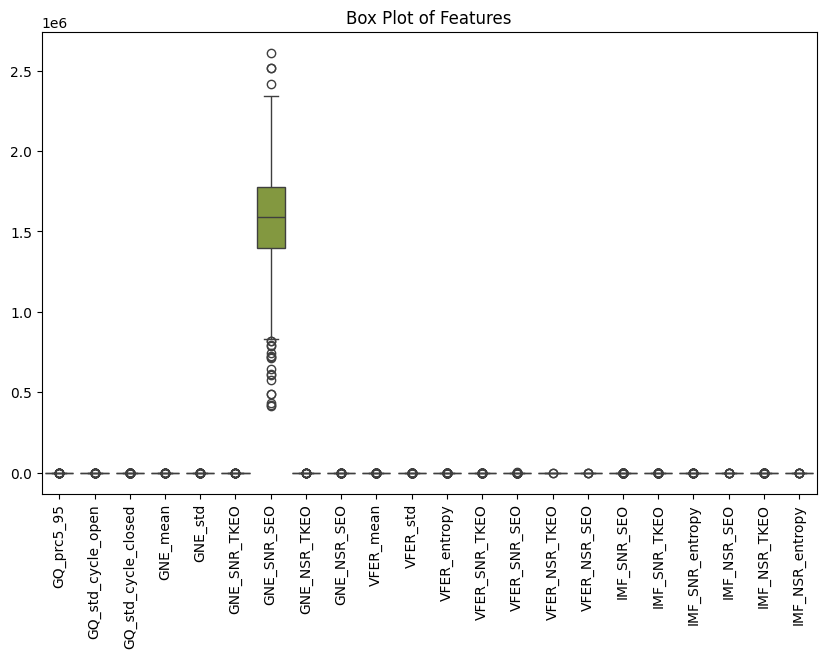

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train.iloc[:,35:57])
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

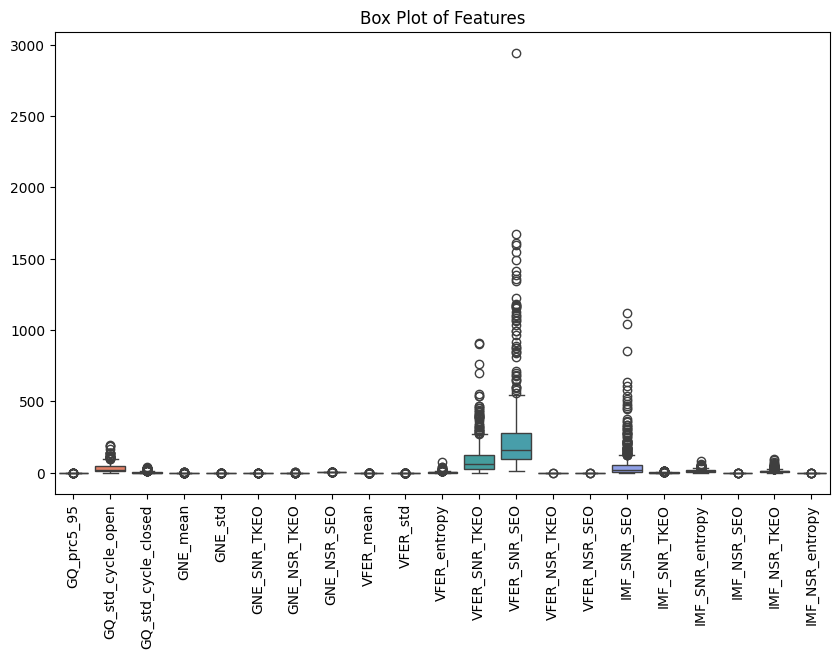

In [54]:
tmp_df = df_train.iloc[:,35:57]
tmp_df2 =  tmp_df.drop('GNE_SNR_SEO', axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(data=tmp_df2)
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

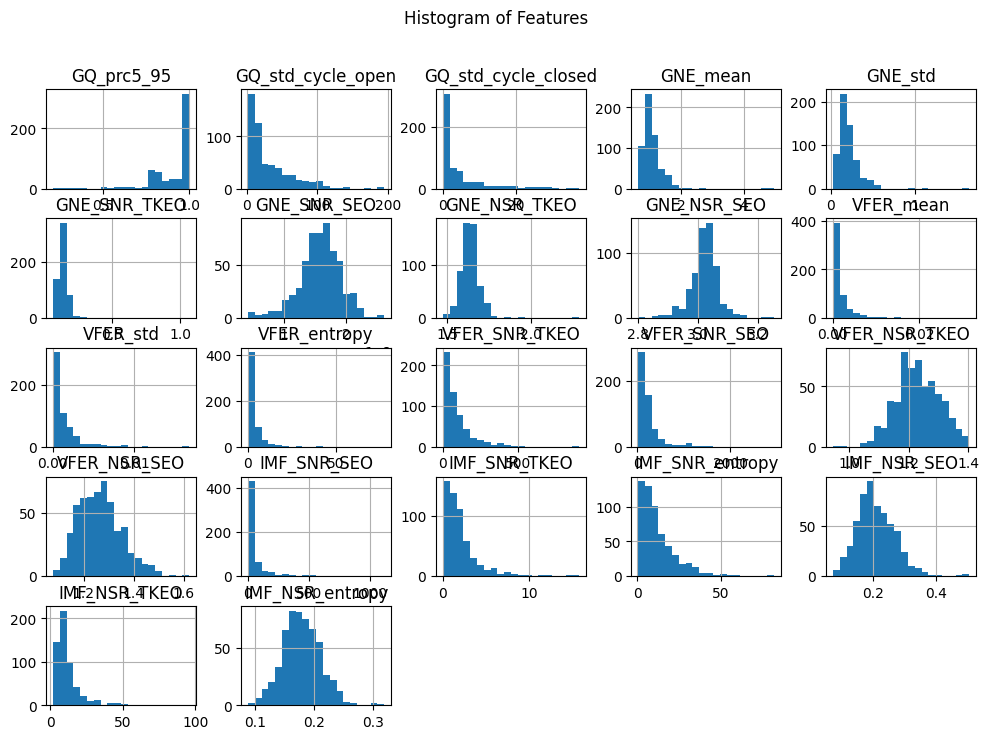

In [55]:
df_train.iloc[:,35:57].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram of Features')
plt.show()

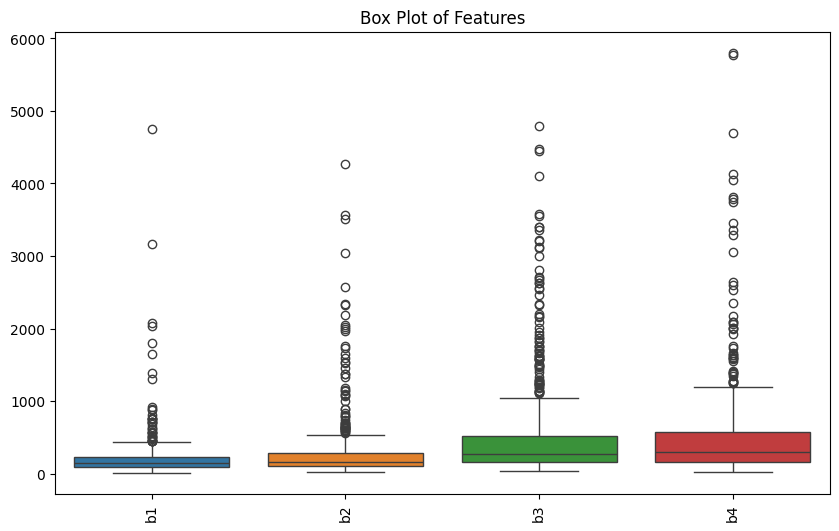

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train.iloc[:,31:35])
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

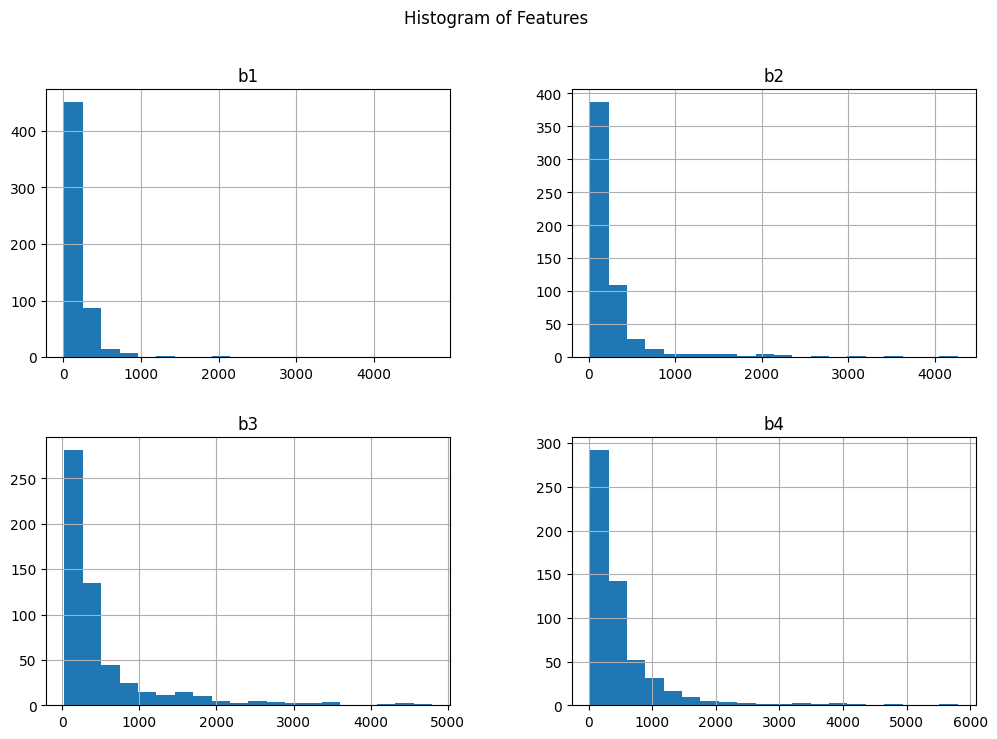

In [57]:
df_train.iloc[:,31:35].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram of Features')
plt.show()

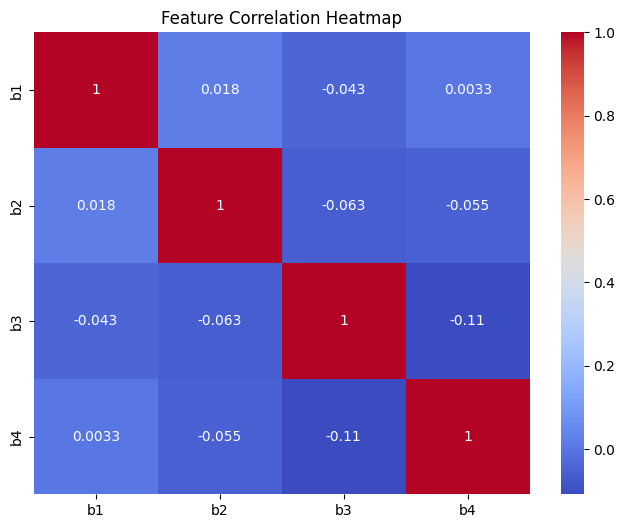

In [58]:
corr_matrix3= df_train.iloc[:,31:35].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix3, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

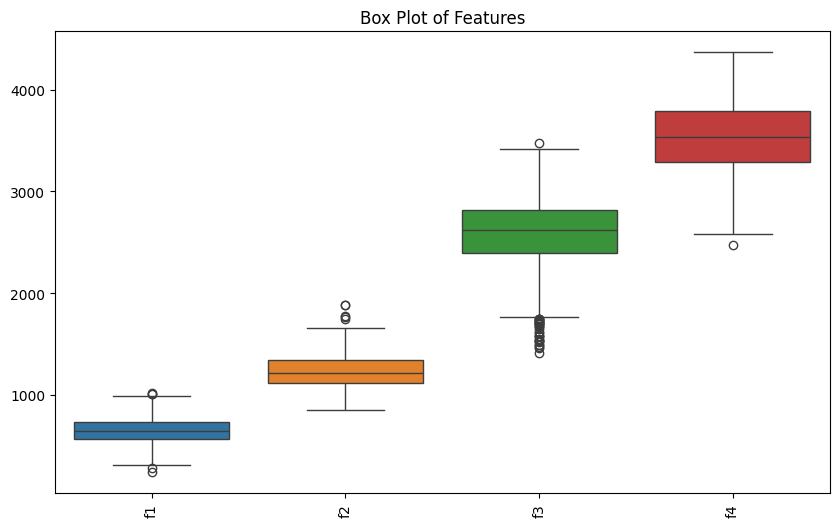

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train.iloc[:,27:31])
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

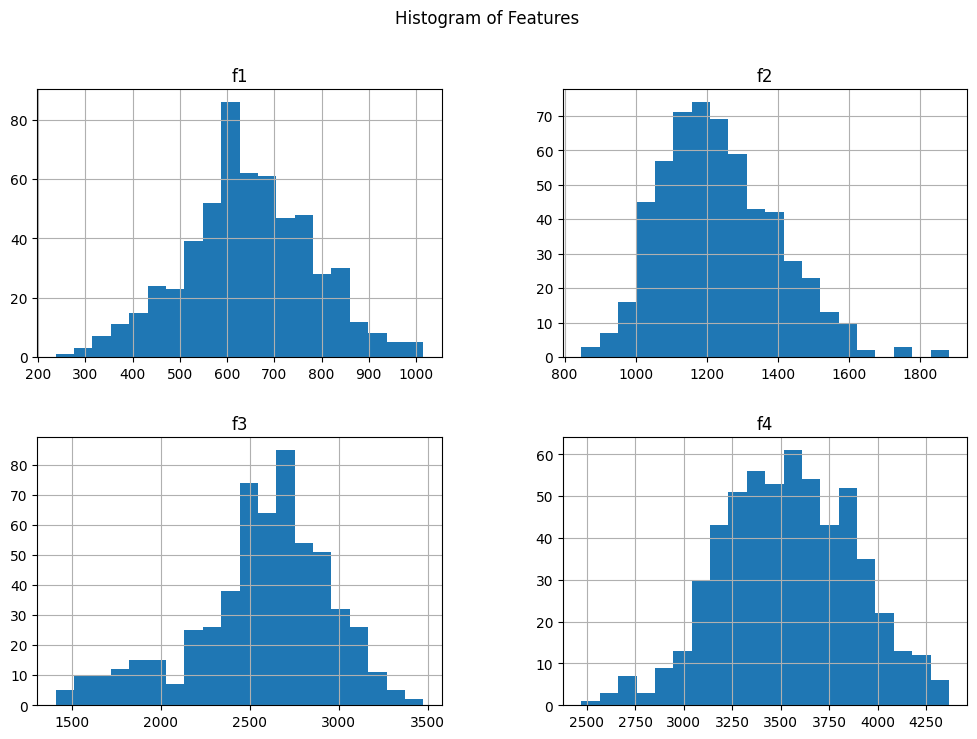

In [60]:
df_train.iloc[:,27:31].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram of Features')
plt.show()

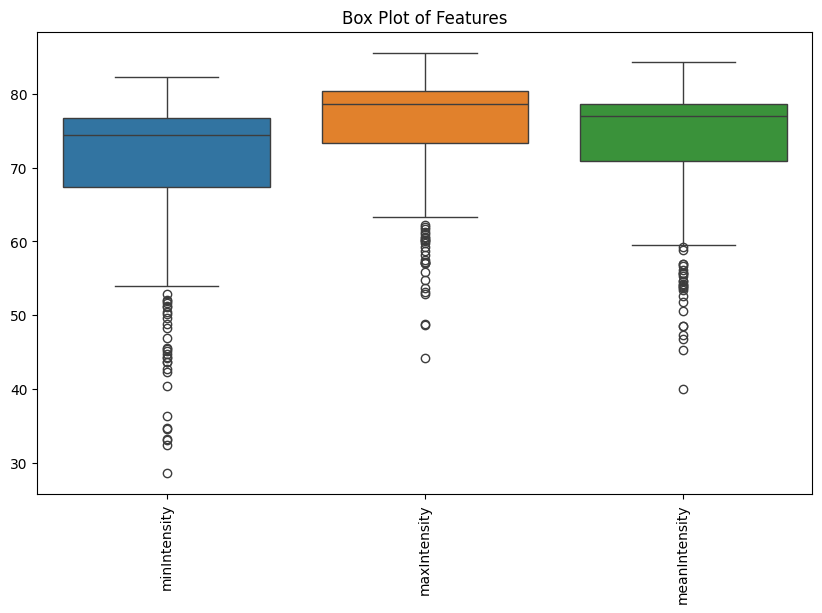

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train.iloc[:,24:27])
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

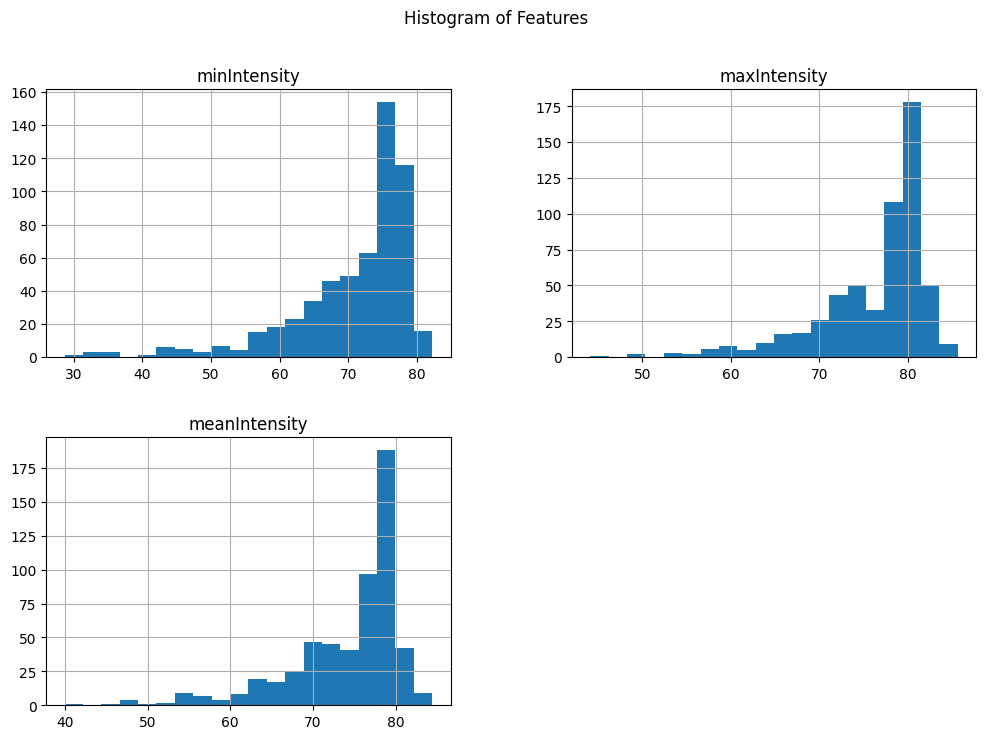

In [62]:
df_train.iloc[:,24:27].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram of Features')
plt.show()

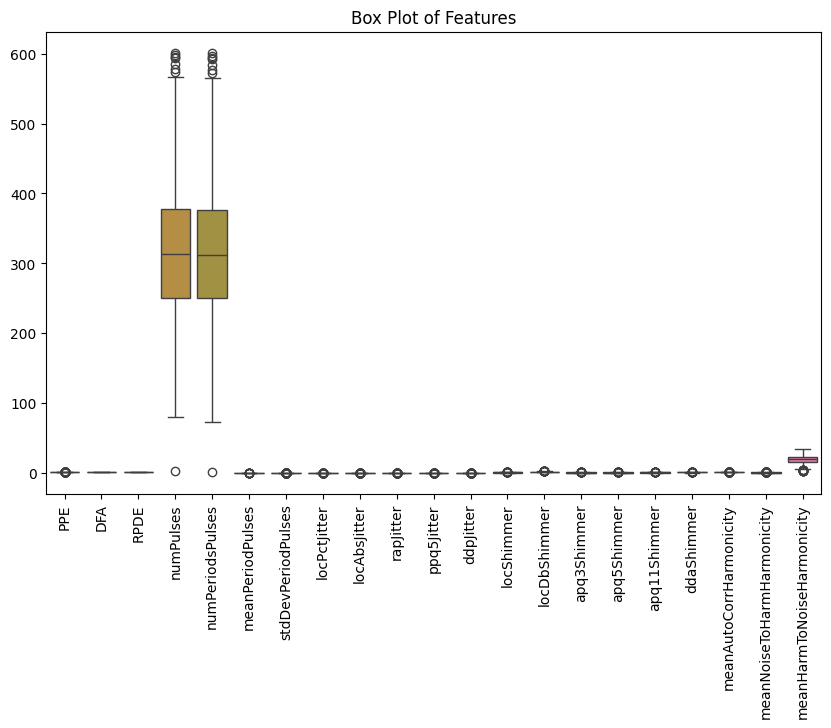

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train.iloc[:,3:24])
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

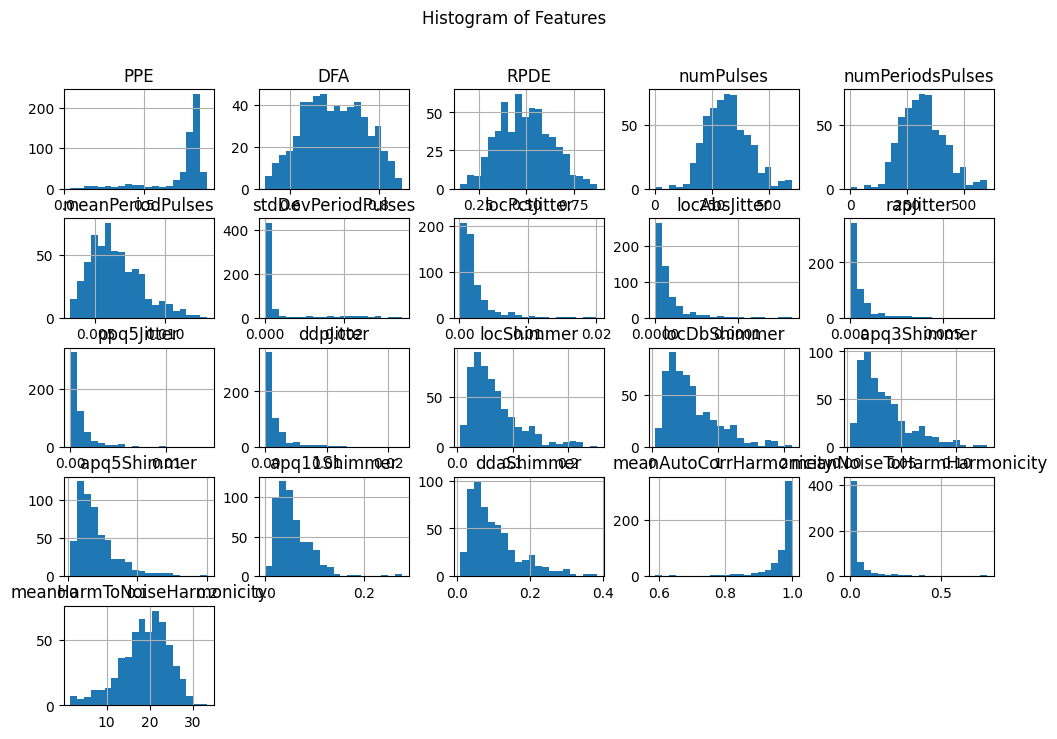

In [64]:
df_train.iloc[:,3:24].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram of Features')
plt.show()

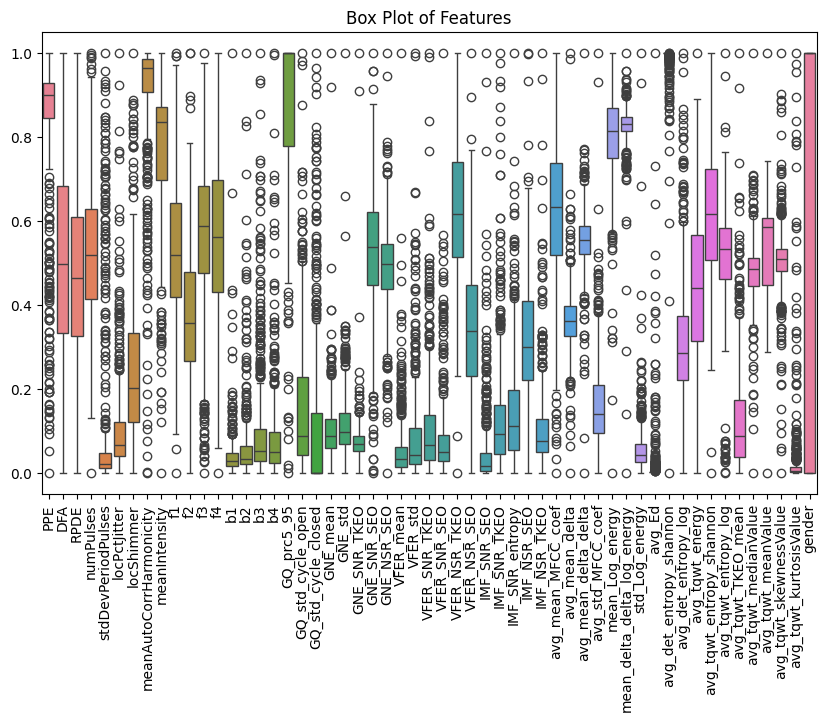

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_normalized_reduced)
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()